# Explorando a função de erro

Neste exemplo, vamos explorar a função de erro, também conhecida como função de custo, e entender como ela auxilia na busca pelo conjunto de pesos que a minimiza.

#### Importando as bibliotecas

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#### Definindo os dados de entrada e os rótulos (i.e., valores de saída esperados)

In [13]:
#entrada
x = np.array([-1, 0, 1, 2, 3, 4])
#saida esperada
y = np.array([-3, -1, 1, 3, 5, 7])

#### Plotando o conjunto de dados.

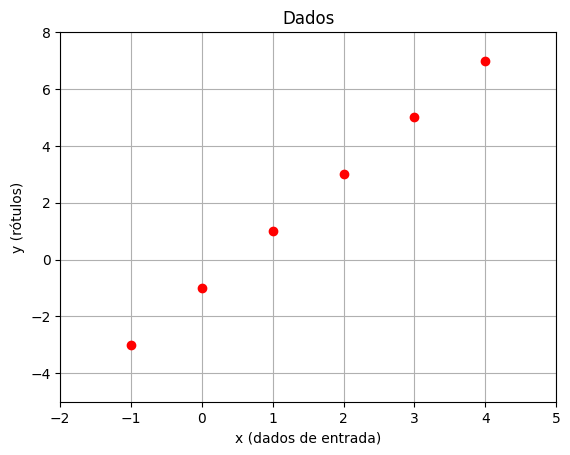

In [14]:
plt.plot(x, y, 'o', color='red')
plt.axis([-2, 5, -5, 8])
plt.title('Dados')
plt.xlabel('x (dados de entrada)')
plt.ylabel('y (rótulos)')
plt.grid()
plt.show()

### Qual formato de função se adaptaria bem aos dados?

#### Vamos usar a equação de uma reta, $\hat{y} = a_0 + a_1 x$, e modificar seus parâmetros ($a_0$ and $a_1$) para verificar a variação do erro.

- Vamos definir valores para $a_0$ e $a_1$,
- Executar as células abaixo,
- E calcular $\hat{y}$.

#### Definindo valores para os pesos:  $a_0=-1$, e $a_1=3$, então: $\hat{y}=-1 + 3x$

In [15]:
a0 = -1
a1 = 3

#### Calculando $\hat{y}$.

In [16]:
y_hat = np.zeros((len(y),))

for i, xi in enumerate(x):
    y_hat[i] = a0 + a1*xi
    print(y_hat[i])

print("")
print("Valores esperados: " + str(y))
print("Predições:" + str(y_hat))

-4.0
-1.0
2.0
5.0
8.0
11.0

Valores esperados: [-3 -1  1  3  5  7]
Predições:[-4. -1.  2.  5.  8. 11.]


#### Comparando as predições com os valores esperados.

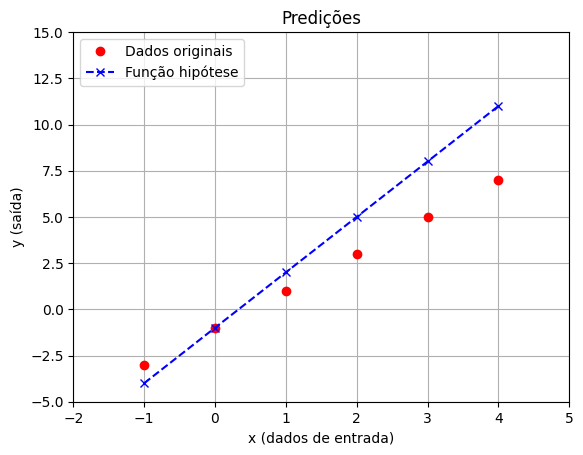

In [17]:
plt.plot(x, y, 'o', color='red', label='Dados originais')
plt.plot(x, y_hat, '--x', color='blue',  label='Função hipótese')
plt.axis([-2, 5, -5, 15])
plt.title('Predições')
plt.xlabel('x (dados de entrada)')
plt.ylabel('y (saída)')
plt.legend(loc='upper left')
plt.grid()

#### Definição de uma função que calcula o MSE.

Para nos auxiliar, vamos definir uma função que calcule o MSE e retorne além dele, um vetor com as predições.

In [18]:
#função recebe o conjunto de dados, e passo o a0 e a1 que quero testar
def calc_error (x, y, a0, a1):
    # Obtém o número de exemplos.
    N = len(y)

    # Função hipótese.
    y_hat = np.zeros((N,))
    for i, xi in enumerate(x):
        y_hat[i] = a0 + a1*xi

    # Acumula o erro quadrático.
    total_squared_error = 0
    for i in range(0, N):
        squared_error = (y[i] - y_hat[i]) ** 2
        total_squared_error += squared_error

    # Calcula a média do erro quadrático.
    MSE = (1/N)*(total_squared_error)

    return MSE, y_hat

#### Calculando o MSE

In [19]:
# Cálculo de MSE.
MSE, y_hat = calc_error(x, y, a0, a1)

print("MSE: {:.2f}".format(MSE))

MSE: 5.17


#### Supondo novos valores para os pesos.

Vamos supor agora que $a_0=-2$ e $a_1=2$.

MSE: 1.00


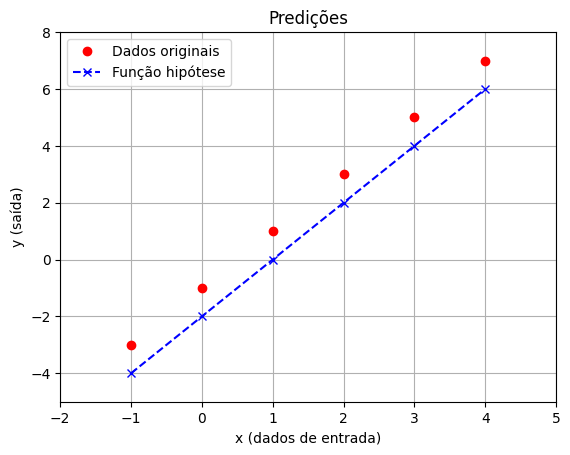

In [20]:
# Calcula o MSE.
MSE, y_hat = calc_error(x, y, a0=-2, a1=2)

# Imprime o novo MSE.
print("MSE: {:.2f}".format(MSE))

# Compara os dados originais com as predições feitas pela função hipótese.
plt.plot(x, y, 'o', color='red', label='Dados originais')
plt.plot(x, y_hat, '--x', color='blue', label='Função hipótese')
plt.axis([-2, 5, -5, 8])
plt.title('Predições')
plt.xlabel('x (dados de entrada)')
plt.ylabel('y (saída)')
plt.legend()
plt.grid()

**Observação**

O valor de $a_0$ pode ser facilmente encontrado ao analisarmos os dados originais.

A reta formada pelos dados originais corta o eixo das ordenadas (i.e., $y$) exatamente em $y=-1$. Portanto, $a_0=-1$.
 + Quando $x=0$, $y=-1$. Assim, substituindo esses valores na equação da função hipótese temos: $\hat{y} = -1 = a_0 + a_1 * 0$, então $a_0 = -1$.

#### Vamos fixar o valor do peso $a_0$, variar o valor do peso $a_1$ e plotar as diferentes funções hipótese.

Vamos fixar $a_0=-1$ e variar o valor de $a_1$.

In [21]:
# Valor fixo de a0.
a0 = -1

# Sequência de valores de a1.
a1_lst = np.array([-2, -1, 0, 1, 2, 3, 4, 5, 6])

# Criando arrays para armazenar os erros e os valores preditos.
MSE_lst = np.zeros((len(a1_lst),))
y_hat_lst = np.zeros((len(a1_lst), len(y)))

# Variando o valor de a1 e calculando as predições e MSE para cada valor.
for i, a1i in enumerate(a1_lst):
    MSEi, y_hat = calc_error(x, y, a0=a0, a1=a1i)
    MSE_lst[i] = MSEi
    y_hat_lst[i,:] = y_hat
    # Imprime o MSE para cada novo valor de a1.
    print("a1: {:.2f} - MSE: {:.2f}".format(a1i, MSEi))

a1: -2.00 - MSE: 82.67
a1: -1.00 - MSE: 46.50
a1: 0.00 - MSE: 20.67
a1: 1.00 - MSE: 5.17
a1: 2.00 - MSE: 0.00
a1: 3.00 - MSE: 5.17
a1: 4.00 - MSE: 20.67
a1: 5.00 - MSE: 46.50
a1: 6.00 - MSE: 82.67


#### Plotando as funções hipótese obtidas com cada novo valor de $a_1$.

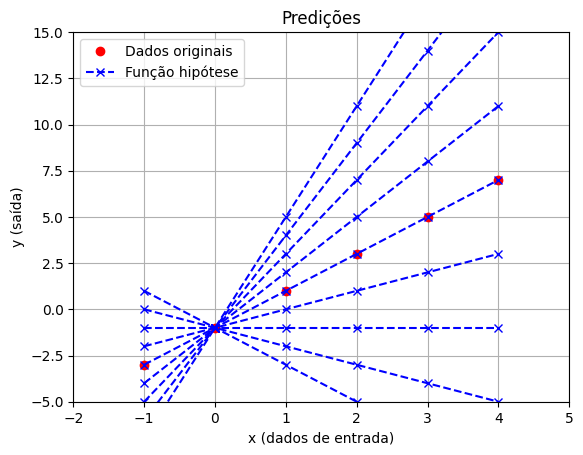

In [22]:
# Plotando as funções hipótese obtidas com cada novo valor de a1.
plt.plot(x, y, 'o', color='red', label='Dados originais')
plt.plot(x, y_hat_lst[0,:], '--x', color='blue', label='Função hipótese')
for i in range(1, len(a1_lst)):
    plt.plot(x, y_hat_lst[i,:], '--x', color='blue')
plt.axis([-2, 5, -5, 15])
plt.title('Predições')
plt.xlabel('x (dados de entrada)')
plt.ylabel('y (saída)')
plt.legend()
plt.grid()

**OBS**.: Percebam nos resultados acima que o erro começa em um valor alto, decresce até 0 e depois volta a crescer.

#### Plotando a varição do MSE em função do peso $a_1$.

+ O gráfico abaixo é conhecido como **superfície de erro** e mostra a superfície criada a partir da variação dos pesos.
<br>

+ Podemos usá-la para **encontrar os pesos ótimos visualmente**, bastando apenas que encontremos o menor valor de erro e os pesos correspondentes.
<br>

+ Porém, essa forma visual só funciona com funções hipótese com até 2 pesos, pois depois disso, não conseguimos mais plotar a superfície.
<br>


**Observação**

+ A superfície está em duas dimensões pois fixamos o valor de $a_0$.
+ Porém, se não tivéssemos feito isso, ela seria uma superfície em três dimensões.

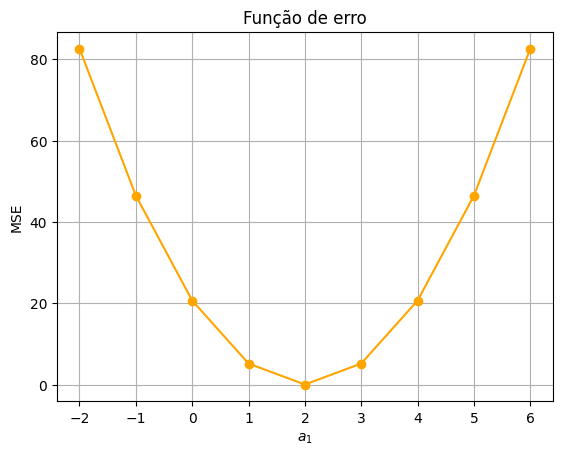

In [23]:
plt.plot(a1_lst, MSE_lst, color='orange', marker='o', label='error')
plt.title('Função de erro')
plt.xlabel('$a_1$')
plt.ylabel('MSE')
plt.grid()
plt.show()

#### Conclusões

+ Percebam que a superfície é **convexa**, ou seja, tem formato de "v" ou de vale.
<br>

+ Isso se deve ao fato da **função de erro** (MSE) ser uma **função quadrática**.
<br>

+ Por ser convexa, a superfície (i.e., a função de erro) contém apenas um ponto de mínimo, chamado de **mínimo global**.
<br>

+ Encontrar esse **ponto de mínimo global é o objetivo do processo de treinamento do modelo**.
<br>

+ Portanto, em breve, veremos uma forma **escalável** (qualquer número de pesos) e **programática** de treinar (i.e., otimizar) o modelo e **encontrar os pesos que minimizam a função de erro**, ou seja, o ponto mais baixo da superfície.
<br>

+ Esse processo de otimização utiliza o **vetor gradiente da função de erro** (i.e., a derivada parcial do EQM em função dos pesos) para **iterativamente atualizar os pesos** até que seus valores ótimos sejam encontrados.
<br>

+ O **vetor gradiente** da função de erro sempre **aponta na direção da maior taxa de crescimento da função**, porém, como o objetivo é encontrar o mínimo, o processo de otimização seguirá no **sentido oposto**.
    + O vetor gradiente poder ser interpretado também com sendo a inclinação de um hiperplano tangente a um ponto qualquer na função.
<br/><br/>


+ Como sabemos quando os valores ótimos dos pesos (i.e., ponto de mínimo da função) foram encontrados?
    + É o **ponto onde a derivada parcial do EQM em função dos pesos é igual a zero**, ou seja, o ponto onde a **taxa de variação da função é igual a zero** (i.e., o ponto onde a inclinação do hiperplano tangente a ele é igual a 0).

**OBS**.: No caso deste exemplo, o erro mínimo é igual a zero, mas em geral, o erro mínimo é diferente de zero, pois os dados estão corrompidos com ruído.